# Data Preprocess for stacking the 2D CAT scans into 3D images

In [1]:
# Using the patchify package
!pip install patchify

In [2]:
import sys
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from patchify import patchify, unpatchify

In [3]:
# Load the dataset
def load_2Dimages(folder):
    images = []
    # Keep the information of axis z (each slice)
    file_list = sorted(file for file in os.listdir(folder) if file.endswith('.png'))

    for filename in file_list:
        path = os.path.join(folder, filename)
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)  # grayscale
        if img is not None:
            images.append(img)
    return images

# Stack them for 3D image
def stack_3D_image(images):
    stacked_images = np.stack(images, axis=-1)
    return stacked_images

# Separate into patches
def patch_original(folder_path):
    images2D = load_2Dimages(folder_path)
    image = stack_3D_image(images2D)
    # step=128 for 16 patches means no overlap
    img_patches = patchify(image, (128, 128, 64), step=128)
    img = np.reshape(img_patches, (-1, img_patches.shape[3], img_patches.shape[4], img_patches.shape[5]))
    # 3 channels for the segmentation model (although grayscale just has 1 channel)
    original = np.stack((img,)*3, axis=-1)
    
    return original

def patch_mask(folder_path):
    images2D = load_2Dimages(folder_path)
    image = stack_3D_image(images2D)
    # step=128 for 16 patches means no overlap
    img_patches = patchify(image, (128, 128, 64), step=128)
    image3D = np.reshape(img_patches, (-1, img_patches.shape[3], img_patches.shape[4], img_patches.shape[5]))
    
    # Two classes for 2 channels:  White (1, 0) Black (0, 1)
    mask_2_channels = np.zeros(image3D.shape + (2,))
    indices_greater_than_0_5 = np.where(image3D > 5)
    for idx in zip(*indices_greater_than_0_5):
        mask_2_channels[idx[0],idx[1],idx[2],idx[3],0] = 1

    indices_smaller_than_0_5 = np.where(image3D < 5)
    for idx in zip(*indices_smaller_than_0_5):
        mask_2_channels[idx[0],idx[1],idx[2],idx[3],1] = 1

    return mask_2_channels

In [4]:
# Process the image after windowing
def windowing(image_arr, window_level, window_width):
    window_max = window_level + 0.5*window_width
    window_min = window_level - 0.5*window_width
     
    index_min = image_arr < window_min
    index_max = image_arr > window_max
     
    image_arr = (image_arr - window_min) / (window_width/256) - 1

    image_arr[index_min] = 0
    image_arr[index_max] = 255
     
    return image_arr

def patch_original_windowing(folder_path, wl, ww):
    images2D = load_2Dimages(folder_path)
    image = stack_3D_image(images2D)
    image = windowing(image, wl, ww)
    # step=128 for 16 patches means no overlap
    img_patches = patchify(image, (128, 128, 64), step=128)
    img = np.reshape(img_patches, (-1, img_patches.shape[3], img_patches.shape[4], img_patches.shape[5]))
    # 3 channels for the segmentation model (although grayscale just has 1 channel)
    original = np.stack((img,)*3, axis=-1)
    
    return original

In [6]:
# Training set
path_train_original1 = "/Users/yichunsun/Desktop/TFM/Data/3D/Training/Original/TAC1"
path_train_mask1 = "/Users/yichunsun/Desktop/TFM/Data/3D/Training/Mask/TAC1"
path_train_original2 = "/Users/yichunsun/Desktop/TFM/Data/3D/Training/Original/TAC2"
path_train_mask2 = "/Users/yichunsun/Desktop/TFM/Data/3D/Training/Mask/TAC2"
path_train_original3 = "/Users/yichunsun/Desktop/TFM/Data/3D/Training/Original/TAC3"
path_train_mask3 = "/Users/yichunsun/Desktop/TFM/Data/3D/Training/Mask/TAC3"
path_train_original4 = "/Users/yichunsun/Desktop/TFM/Data/3D/Training/Original/TAC4"
path_train_mask4 = "/Users/yichunsun/Desktop/TFM/Data/3D/Training/Mask/TAC4"
path_train_original5 = "/Users/yichunsun/Desktop/TFM/Data/3D/Training/Original/TAC5"
path_train_mask5 = "/Users/yichunsun/Desktop/TFM/Data/3D/Training/Mask/TAC5"
path_train_original6 = "/Users/yichunsun/Desktop/TFM/Data/3D/Training/Original/TAC6"
path_train_mask6 = "/Users/yichunsun/Desktop/TFM/Data/3D/Training/Mask/TAC6"
path_train_original7 = "/Users/yichunsun/Desktop/TFM/Data/3D/Training/Original/TAC7"
path_train_mask7 = "/Users/yichunsun/Desktop/TFM/Data/3D/Training/Mask/TAC7"

# Validation set
path_validation_original = "/Users/yichunsun/Desktop/TFM/Data/3D/Validation/Original"
path_validation_mask = "/Users/yichunsun/Desktop/TFM/Data/3D/Validation/Mask"

# Test set
path_test_original = "/Users/yichunsun/Desktop/TFM/Data/3D/Test/Original"
path_test_mask = "/Users/yichunsun/Desktop/TFM/Data/3D/Test/Mask"

In [107]:
# Convert into 3D images
# Training set
train_original1_3D = patch_original(path_train_original1)
train_mask1_3D = patch_mask(path_train_mask1)
train_original2_3D = patch_original(path_train_original2)
train_mask2_3D = patch_mask(path_train_mask2)
train_original3_3D = patch_original(path_train_original3)
train_mask3_3D = patch_mask(path_train_mask3)
train_original4_3D = patch_original(path_train_original4)
train_mask4_3D = patch_mask(path_train_mask4)
train_original5_3D = patch_original(path_train_original5)
train_mask5_3D = patch_mask(path_train_mask5)
train_original6_3D = patch_original(path_train_original6)
train_mask6_3D = patch_mask(path_train_mask6)
train_original7_3D = patch_original(path_train_original7)
train_mask7_3D = patch_mask(path_train_mask7)

# Validation set
validation_original_3D = patch_original(path_validation_original)
validation_mask_3D = patch_mask(path_validation_mask)

# Test set
test_original_3D = patch_original(path_test_original)
test_mask_3D = patch_mask(path_test_mask)

# For training: Stacking 3D images into a batch
train_original_3D = np.concatenate((train_original1_3D, train_original2_3D, train_original3_3D, train_original4_3D,
                             train_original5_3D, train_original6_3D, train_original7_3D), axis=0)
train_mask_3D = np.concatenate((train_mask1_3D, train_mask2_3D, train_mask3_3D,
                         train_mask4_3D, train_mask5_3D, train_mask6_3D, train_mask7_3D), axis=0)

In [ ]:
# Save the data of 3D images
np.save('/Users/yichunsun/Desktop/TFM/Data/3D/3D_npy_files/3D_train_original.npy', train_original_3D)
np.save('/Users/yichunsun/Desktop/TFM/Data/3D/3D_npy_files/3D_train_mask.npy', train_mask_3D)
np.save('/Users/yichunsun/Desktop/TFM/Data/3D/3D_npy_files/3D_validation_original.npy', validation_original_3D)
np.save('/Users/yichunsun/Desktop/TFM/Data/3D/3D_npy_files/3D_validation_mask.npy', validation_mask_3D)
np.save('/Users/yichunsun/Desktop/TFM/Data/3D/3D_npy_files/3D_test_original.npy', test_original_3D)
np.save('/Users/yichunsun/Desktop/TFM/Data/3D/3D_npy_files/3D_test_mask.npy', test_mask_3D)

In [57]:
# For windowing
# 1 black background: 91, 7
# 2 few black: 70, 15
# 3 white background: 53, 100
# 4 skull: 60, 10
# 5 bone: 60, 225
# 6 Mediastrinum 57, 40
paths = [path_train_original1, path_train_original2, path_train_original3, 
         path_train_original4, path_train_original5, path_train_original6, 
         path_train_original7]

to1_w1 = np.zeros((16, 128, 128, 64, 3, 7))
to1_w2 = np.zeros((16, 128, 128, 64, 3, 7))
to1_w3 = np.zeros((16, 128, 128, 64, 3, 7))
to1_w4 = np.zeros((16, 128, 128, 64, 3, 7))
to1_w5 = np.zeros((16, 128, 128, 64, 3, 7))
to1_w6 = np.zeros((16, 128, 128, 64, 3, 7))
i = 0

for path in paths:
    to1_w1[:, :, :, :, :, i] = patch_original_windowing(path, 91, 7)
    to1_w2[:, :, :, :, :, i] = patch_original_windowing(path, 70, 15)
    to1_w3[:, :, :, :, :, i] = patch_original_windowing(path, 53, 100)
    to1_w4[:, :, :, :, :, i] = patch_original_windowing(path, 60, 10)
    to1_w5[:, :, :, :, :, i] = patch_original_windowing(path, 60, 225)
    to1_w6[:, :, :, :, :, i] = patch_original_windowing(path, 57, 40)
    i = i+1
    
tro_w1 = np.concatenate((to1_w1[:, :, :, :, :, 0], to1_w1[:, :, :, :, :, 1], to1_w1[:, :, :, :, :, 2],
                         to1_w1[:, :, :, :, :, 3], to1_w1[:, :, :, :, :, 4], to1_w1[:, :, :, :, :, 5],
                         to1_w1[:, :, :, :, :, 6]), axis=0)
tro_w2 = np.concatenate((to1_w2[:, :, :, :, :, 0], to1_w2[:, :, :, :, :, 1], to1_w2[:, :, :, :, :, 2],
                         to1_w2[:, :, :, :, :, 3], to1_w2[:, :, :, :, :, 4], to1_w2[:, :, :, :, :, 5],
                         to1_w2[:, :, :, :, :, 6]), axis=0)
tro_w3 = np.concatenate((to1_w3[:, :, :, :, :, 0], to1_w3[:, :, :, :, :, 1], to1_w3[:, :, :, :, :, 2],
                         to1_w3[:, :, :, :, :, 3], to1_w3[:, :, :, :, :, 4], to1_w3[:, :, :, :, :, 5],
                         to1_w3[:, :, :, :, :, 6]), axis=0)
tro_w4 = np.concatenate((to1_w4[:, :, :, :, :, 0], to1_w4[:, :, :, :, :, 1], to1_w4[:, :, :, :, :, 2],
                         to1_w4[:, :, :, :, :, 3], to1_w4[:, :, :, :, :, 4], to1_w4[:, :, :, :, :, 5],
                         to1_w4[:, :, :, :, :, 6]), axis=0)
tro_w5 = np.concatenate((to1_w5[:, :, :, :, :, 0], to1_w5[:, :, :, :, :, 1], to1_w5[:, :, :, :, :, 2],
                         to1_w5[:, :, :, :, :, 3], to1_w5[:, :, :, :, :, 4], to1_w5[:, :, :, :, :, 5],
                         to1_w5[:, :, :, :, :, 6]), axis=0)
tro_w6 = np.concatenate((to1_w6[:, :, :, :, :, 0], to1_w6[:, :, :, :, :, 1], to1_w6[:, :, :, :, :, 2],
                         to1_w6[:, :, :, :, :, 3], to1_w6[:, :, :, :, :, 4], to1_w6[:, :, :, :, :, 5],
                         to1_w6[:, :, :, :, :, 6]), axis=0)

In [81]:
np.save('/Users/yichunsun/Desktop/TFM/Data/3D/3D_npy_files/tro_w1.npy', tro_w1)
np.save('/Users/yichunsun/Desktop/TFM/Data/3D/3D_npy_files/tro_w2.npy', tro_w2)
np.save('/Users/yichunsun/Desktop/TFM/Data/3D/3D_npy_files/tro_w3.npy', tro_w3)
np.save('/Users/yichunsun/Desktop/TFM/Data/3D/3D_npy_files/tro_w4.npy', tro_w4)
np.save('/Users/yichunsun/Desktop/TFM/Data/3D/3D_npy_files/tro_w5.npy', tro_w5)
np.save('/Users/yichunsun/Desktop/TFM/Data/3D/3D_npy_files/tro_w6.npy', tro_w6)

In [76]:
# Validation windowing
vo_w1 = patch_original_windowing(path_validation_original, 91, 7)
vo_w2 = patch_original_windowing(path_validation_original, 70, 15)
vo_w3 = patch_original_windowing(path_validation_original, 53, 100)
vo_w4 = patch_original_windowing(path_validation_original, 60, 10)
vo_w5 = patch_original_windowing(path_validation_original, 60, 225)
vo_w6 = patch_original_windowing(path_validation_original, 57, 40)

In [82]:
np.save('/Users/yichunsun/Desktop/TFM/Data/3D/3D_npy_files/vo_w1.npy', vo_w1)
np.save('/Users/yichunsun/Desktop/TFM/Data/3D/3D_npy_files/vo_w2.npy', vo_w2)
np.save('/Users/yichunsun/Desktop/TFM/Data/3D/3D_npy_files/vo_w3.npy', vo_w3)
np.save('/Users/yichunsun/Desktop/TFM/Data/3D/3D_npy_files/vo_w4.npy', vo_w4)
np.save('/Users/yichunsun/Desktop/TFM/Data/3D/3D_npy_files/vo_w5.npy', vo_w5)
np.save('/Users/yichunsun/Desktop/TFM/Data/3D/3D_npy_files/vo_w6.npy', vo_w6)

In [77]:
# Test windowing
testo_w1 = patch_original_windowing(path_test_original, 91, 7)
testo_w2 = patch_original_windowing(path_test_original, 70, 15)
testo_w3 = patch_original_windowing(path_test_original, 53, 100)
testo_w4 = patch_original_windowing(path_test_original, 60, 10)
testo_w5 = patch_original_windowing(path_test_original, 60, 225)
testo_w6 = patch_original_windowing(path_test_original, 57, 40)

In [83]:
np.save('/Users/yichunsun/Desktop/TFM/Data/3D/3D_npy_files/testo_w1.npy', testo_w1)
np.save('/Users/yichunsun/Desktop/TFM/Data/3D/3D_npy_files/testo_w2.npy', testo_w2)
np.save('/Users/yichunsun/Desktop/TFM/Data/3D/3D_npy_files/testo_w3.npy', testo_w3)
np.save('/Users/yichunsun/Desktop/TFM/Data/3D/3D_npy_files/testo_w4.npy', testo_w4)
np.save('/Users/yichunsun/Desktop/TFM/Data/3D/3D_npy_files/testo_w5.npy', testo_w5)
np.save('/Users/yichunsun/Desktop/TFM/Data/3D/3D_npy_files/testo_w6.npy', testo_w6)

In [49]:
# Check the dimensions
print("Dimension of the training 3D original image:", tro_w2.shape)
print("Dimension of the validation 3D original image:", vo_w5.shape)
print("Dimension of the test 3D original image:", testo_w1.shape)

(16, 128, 128, 64, 3)

In [108]:
# Check the dimensions
print("Dimension of the training 3D original image:", train_original_3D.shape)
print("Dimension of the mask of training set:", train_mask_3D.shape)
print("Dimension of the validation 3D original image:", validation_original_3D.shape)
print("Dimension of the mask of validation set:", validation_mask_3D.shape)
print("Dimension of the test 3D original image:", test_original_3D.shape)
print("Dimension of the mask of test set:", test_mask_3D.shape)

Dimension of the training 3D original image: (112, 128, 128, 64, 3)
Dimension of the mask of training set: (112, 128, 128, 64, 2)
Dimension of the validation 3D original image: (16, 128, 128, 64, 3)
Dimension of the mask of validation set: (16, 128, 128, 64, 2)
Dimension of the test 3D original image: (16, 128, 128, 64, 3)
Dimension of the mask of test set: (16, 128, 128, 64, 2)


In [ ]:
# Check the patches
# Change the patch and slice
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].imshow(train_original_3D[74,:,:,33,0], cmap='gray')
axes[0].set_title('Original image')

axes[1].imshow(train_mask_3D[43,:,:,23,0], cmap='gray')
axes[1].set_title('Mask')
    
plt.show()

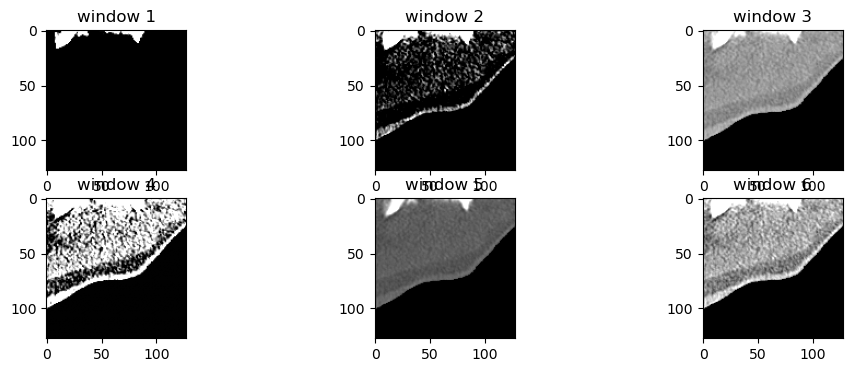

In [80]:
fig, axes = plt.subplots(2, 3, figsize=(12, 4))

axes[0,0].imshow(testo_w1[14,:,:,33,0], cmap='gray')
axes[0,0].set_title('window 1')

axes[0,1].imshow(testo_w2[14,:,:,33,0], cmap='gray')
axes[0,1].set_title('window 2')

axes[0,2].imshow(testo_w3[14,:,:,33,0], cmap='gray')
axes[0,2].set_title('window 3')

axes[1,0].imshow(testo_w4[14,:,:,33,0], cmap='gray')
axes[1,0].set_title('window 4')

axes[1,1].imshow(testo_w5[14,:,:,33,0], cmap='gray')
axes[1,1].set_title('window 5')

axes[1,2].imshow(testo_w6[14,:,:,33,0], cmap='gray')
axes[1,2].set_title('window 6')
    
plt.show()

In [9]:
# 1 black background: 91, 7
# 4 few black: 70, 15
# 3 white background: 53, 100
# 2 skull: 60, 10
# 5 bone: 60, 225
# 6 Mediastrinum 57, 40
images2D = load_2Dimages(path_train_original2)
image = stack_3D_image(images2D)
testo_w1 = windowing(image, 91, 7)
testo_w2 = windowing(image, 60, 10)
testo_w3 = windowing(image, 53, 100)
testo_w4 = windowing(image, 70, 15)
testo_w5 = windowing(image, 60, 225)
testo_w6 = windowing(image, 57, 40)

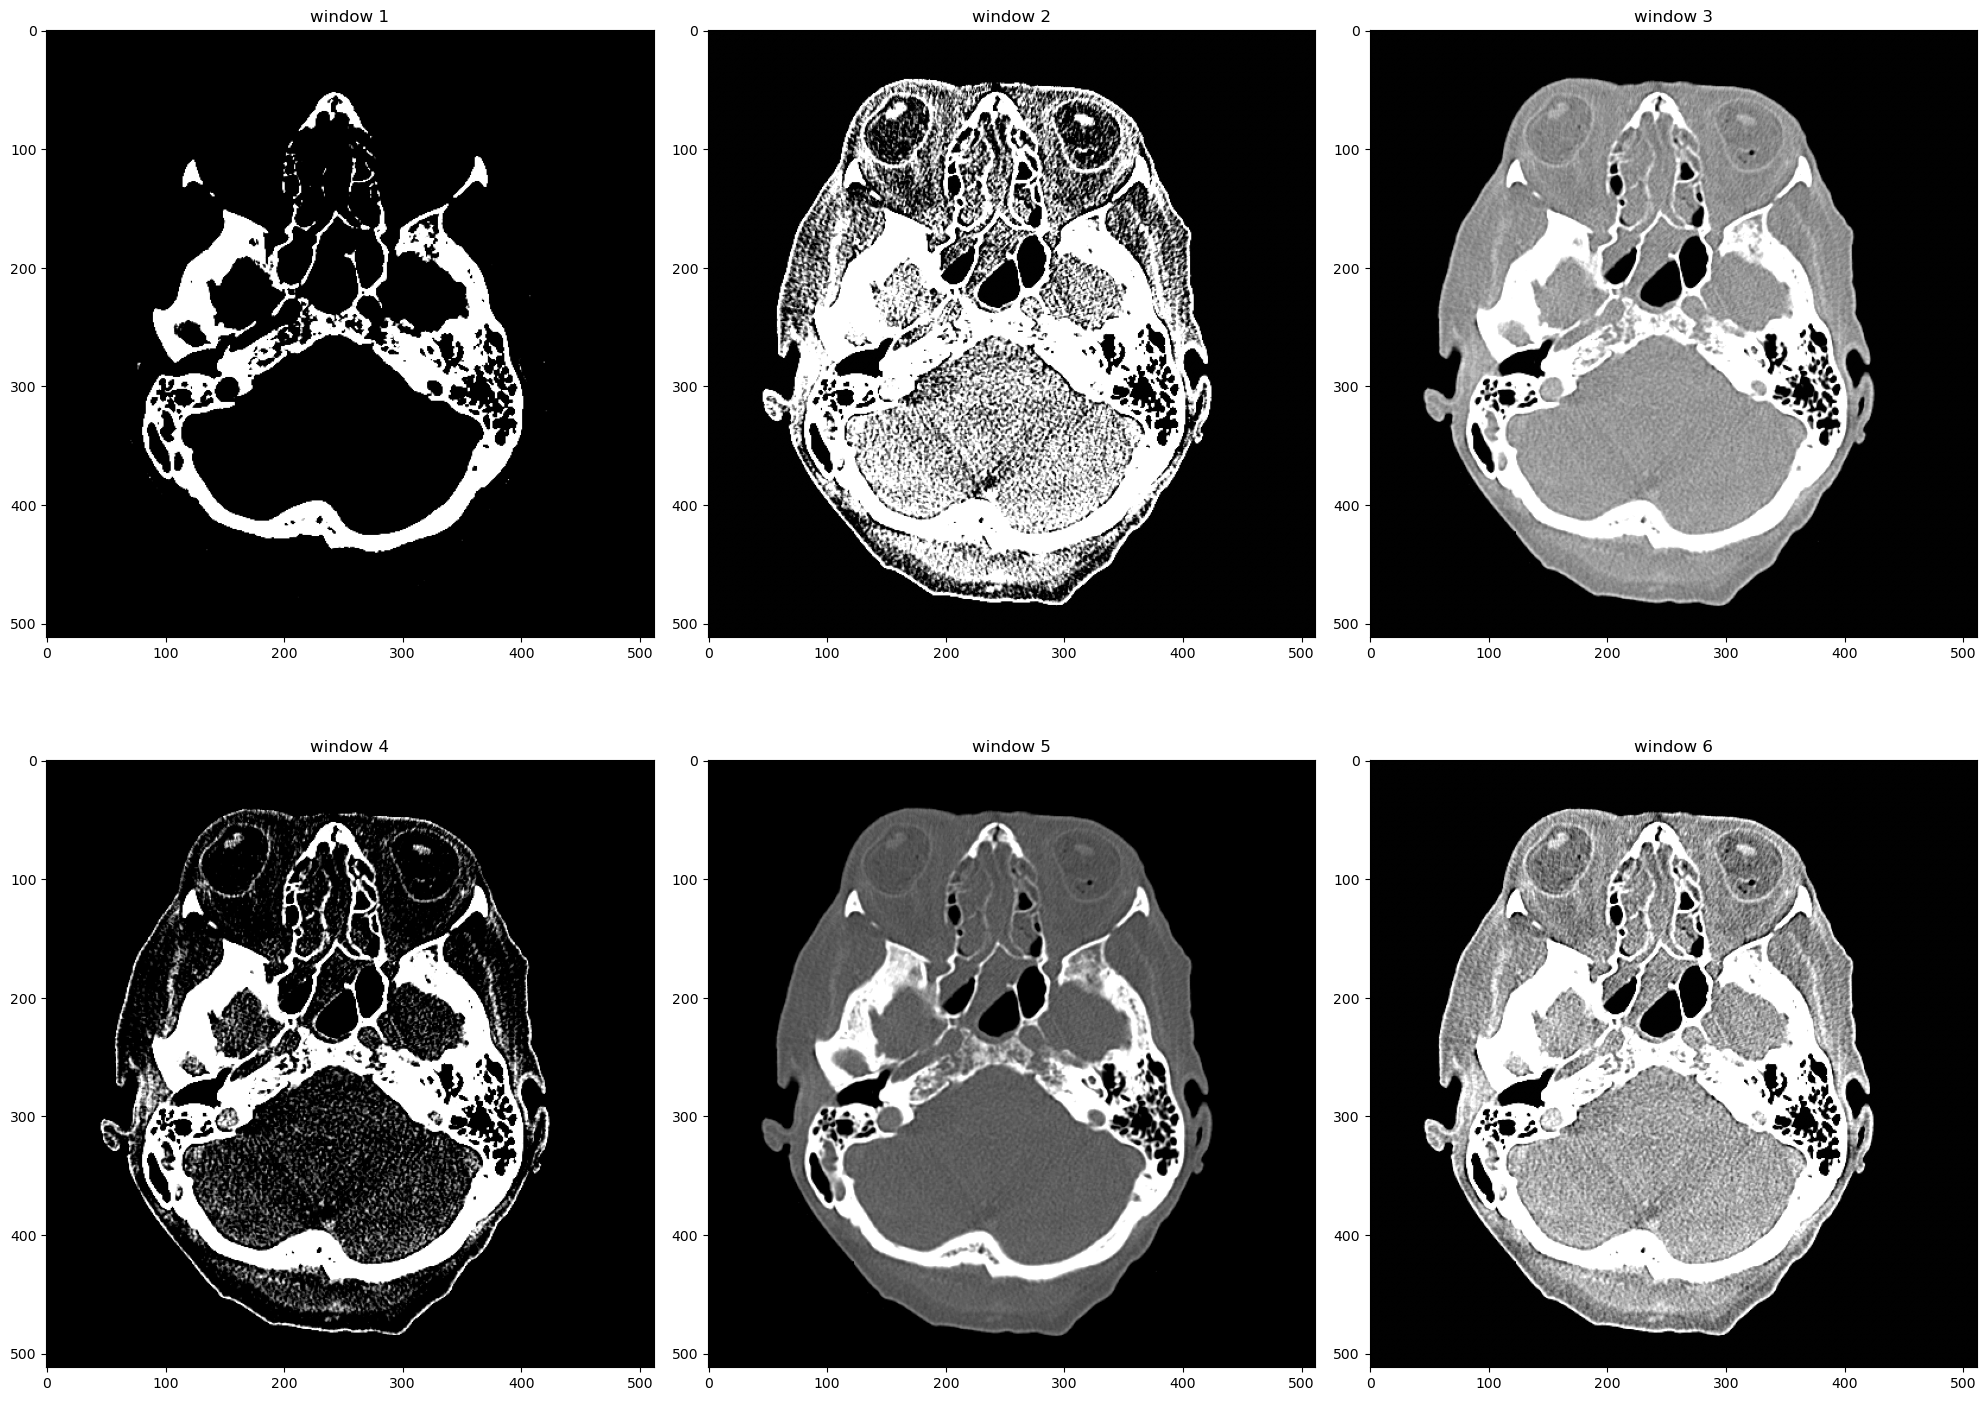

In [10]:
fig, axes = plt.subplots(2, 3, figsize=(20, 15))

axes[0,0].imshow(testo_w1[:,:,40], cmap='gray')
axes[0,0].set_title('window 1')

axes[0,1].imshow(testo_w2[:,:,40], cmap='gray')
axes[0,1].set_title('window 2')

axes[0,2].imshow(testo_w3[:,:,40], cmap='gray')
axes[0,2].set_title('window 3')

axes[1,0].imshow(testo_w4[:,:,40], cmap='gray')
axes[1,0].set_title('window 4')

axes[1,1].imshow(testo_w5[:,:,40], cmap='gray')
axes[1,1].set_title('window 5')

axes[1,2].imshow(testo_w6[:,:,40], cmap='gray')
axes[1,2].set_title('window 6')

plt.tight_layout()
    
plt.show()